## Ch4 exercises

My attempt at Q13 and Q14 

### 1 Libraries and dataset(s)

In [1]:
import numpy as np # numerical computing library for working with arrays, linear algebra etc
import matplotlib.pyplot as plt # for creating plots
import pandas as pd  # data manipulation and analysis library for creating data structures 
import math
from patsy import dmatrices
import statsmodels.discrete.discrete_model as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
from statsmodels.graphics.regressionplots import * # imports all
from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import preprocessing

In [16]:
weekly = pd.read_csv('data/Weekly.csv', header = 0)

#### Dataset description

'Weekly' is stock market data simialr to 'Smarket' except contains 1089 weekly returns for 21 years (1990 – 2010). Variables include:

- <b>'Year'</b> : the year of the observation.
- <b>'Lag1', 'Lag2, 'Lag3', 'Lag4', 'Lag5'</b>: the % returns for each lagged day, where 'Lag1' corresponds to the % return for the previous day,  'Lag2' corresponds to the % return for 2 days previous, and so on. 
- <b>'Volume'</b>: the number of shares traded on the previous day, in billions.
- <b>'Today'</b>: the % returns for the current day
- <b>'Direction'</b>: a binary variable indicating whether the market went up or down on the current day.

The goal is to use the dataset to predict the direction of the stock market based on the previou day's returns and the current day's volume. 

In [15]:
weekly.head(500)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
495,1999,-2.140,-2.080,-4.359,1.105,0.867,0.747330,2.106,Up
496,1999,2.106,-2.140,-2.080,-4.359,1.105,0.750020,0.673,Up
497,1999,0.673,2.106,-2.140,-2.080,-4.359,0.660650,0.872,Up
498,1999,0.872,0.673,2.106,-2.140,-2.080,0.713790,0.665,Up


In [12]:
# computes correlation matrix
weekly_subset = weekly[['Lag1', 'Lag2', 'Lag3', 'Lag5','Volume', 'Today']] 
weekly_subset.corr()

,Lag1,Lag2,Lag3,Lag5,Volume,Today
Lag1,1.000000,-0.074853,0.058636,-0.008183,-0.064951,-0.075032
Lag2,-0.074853,1.000000,-0.075721,-0.072499,-0.085513,0.059167
Lag3,0.058636,-0.075721,1.000000,0.060657,-0.069288,-0.071244
Lag5,-0.008183,-0.072499,0.060657,1.000000,-0.058517,0.011013
Volume,-0.064951,-0.085513,-0.069288,-0.058517,1.000000,-0.033078
Today,-0.075032,0.059167,-0.071244,0.011013,-0.033078,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

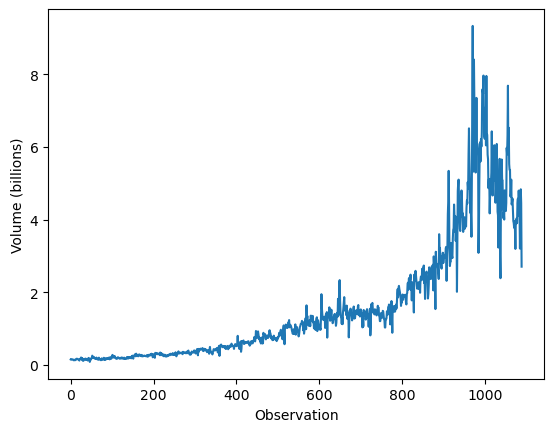

In [14]:
# plotting the volume column
plt.plot(weekly[['Volume']])
plt.xlabel('Observation')
plt.ylabel('Volume (billions)')
plt.show

#### Notes on interpretation in answer to Q13a:
- Correlation matrix shows it's difficult to see any obvious patterns between the quantitative variables
- Plot of volume shows that more recent observations (i.e. those closer to 2010) have a higher number of volumes traded on the previous day on average, and more recent observatinos also tend to have wider volume range of approx 2-3 billion variability on a given day, compared to volume range of 0.5-1 billion variability on oldest obervations.

#### Q13b: logistic regression model with 'direction' as response

In [18]:
# Using 'dmatrices()' function in 'statsmodels' library to create two dataframes, 'y' and 'X'
y, X = dmatrices('Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', weekly, return_type = 'dataframe')
print(y)

      Direction[Down]  Direction[Up]
0                 1.0            0.0
1                 1.0            0.0
2                 0.0            1.0
3                 0.0            1.0
4                 0.0            1.0
...               ...            ...
1084              0.0            1.0
1085              0.0            1.0
1086              0.0            1.0
1087              0.0            1.0
1088              0.0            1.0

[1089 rows x 2 columns]


In [20]:
X.head()

,Intercept,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,1.0,0.816,1.572,-3.936,-0.229,-3.484,0.154976
1,1.0,-0.270,0.816,1.572,-3.936,-0.229,0.148574
2,1.0,-2.576,-0.270,0.816,1.572,-3.936,0.159837
3,1.0,3.514,-2.576,-0.270,0.816,1.572,0.161630
4,1.0,0.712,3.514,-2.576,-0.270,0.816,0.153728


In [22]:
# creating a logistic regression model to predict whether the stock market direction will be up based on the previous days results

logit = sm.Logit(y.iloc[:,1], X) # interested in stock market going up, so selecting column 1 in 'y'
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Direction[Up]   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Wed, 10 May 2023   Pseudo R-squ.:                0.006580
Time:                        17:38:53   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

#### Notes on interpretation
- Lag2 seems statistically significant based on the p-value (0.030) which is less than the common significance level of 0.05.
- Given that the coefficient estimate for Lag2 is positive (0.0584) and taking into account the p-value, there is evidence to support a relationship between the Lag2 variable and the probability of the stock market direction being up.

In [23]:
# performing binary classification using logistic regression so that I can view confusion matrix results on the data
predict_label = pd.DataFrame(np.zeros(shape=(1089,1)), columns = ['Label 1']) # creating new dataframe similar to the original

In [24]:
predict_label.head()

,Label 1
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [25]:
threshold = 0.5 # setting threshold to value for classificaiton to 0.5. Predicted probabilities <0.5 will be classified as 0, predicted probabilities >0.5 will be classified as 1.
predict_label.iloc[logit.fit().predict()>threshold] = 1 # fitting model to data, telling it to change positive classifications to 1

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


In [26]:
# computes a confusing matrix based on true labels and predicted labels of binary classification
confusion_matrix(y.iloc[:,1], predict_label.iloc[:,0])

array([[ 54, 430],
       [ 48, 557]])

In [27]:
# calculates accuracy of binary classification model by comparing predicted labels to the true labels
# then taking mean of the resulting boolean array
print(np.mean(y.iloc[:,1] == predict_label.iloc[:,0]))

0.5610651974288338


#### Notes on interpretation (in answer to Q13c)

- Calculation of accuracy of logistic regression model indicates that the model doesn't seem to be performing much better than chance
- The confusion matrix confirms the same: there appears to be nearly the same number of false positives / negatives as true positives / negatives 

#### Q13d: Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [28]:
# creating testing and training data sets
weekly_test = weekly.query('Year >= 2008')
weekly_train = weekly.query('Year < 2008')

In [29]:
# creating design matrices for each dataset 
# with the response variable set to 'direction' and only using 'Lag2' as the predictor variable
y_train, X_train = dmatrices('Direction~Lag2', weekly_train, return_type = 'dataframe')
y_test, X_test = dmatrices('Direction~Lag2', weekly_test, return_type = 'dataframe')

In [30]:
# fitting logistic regression model to training set
logit = sm.Logit(y_train.iloc[:,1], X_train)
print(logit.fit().summary())

Optimization terminated successfully.
         Current function value: 0.685159
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:          Direction[Up]   No. Observations:                  933
Model:                          Logit   Df Residuals:                      931
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 May 2023   Pseudo R-squ.:                0.001673
Time:                        18:06:30   Log-Likelihood:                -639.25
converged:                       True   LL-Null:                       -640.32
Covariance Type:            nonrobust   LLR p-value:                    0.1433
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2266      0.066      3.422      0.001       0.097       0.356
Lag2           0.0472      0.

In [31]:
# performing logistic regression on the test set, 'X_test'
# then using resulting model to make predictions

preds = logit.fit().predict(X_test) # fitting model to testing set
predict_label = pd.DataFrame(np.zeros(shape=(X_test.shape[0],1)), columns = ['label']) # dataframe of all zeros (?) with same no. rows as 'X_test'
threshold = 0.5
mark = (preds > threshold).reset_index(drop=True) # boolean array indicating which predictors are above threshold and therefore predicted to be positive
predict_label.loc[mark] = 1 # predictions corresponding to values above threshold (as indicated by 'mark') are changed to 1

Optimization terminated successfully.
         Current function value: 0.685159
         Iterations 4


In [32]:
confusion_matrix(y_test.iloc[:,1], predict_label.iloc[:,0]) 

# confusion matrix is compairing the predicted values in 'predict_label' (column 0) to the true values in 'y_test' (column 1)

array([[ 7, 65],
       [ 5, 79]])

In [33]:
# determining the accuracy of this model
np.mean(y_test.iloc[:,1].reset_index(drop=True)==predict_label.iloc[:,0].reset_index(drop=True)) 

0.5512820512820513

#### Notes on interpretation 

- Logistic regression model still doesn't appear to produce accurate results even with only using Lag2 variable alone.

#### Q13e: refitting data to LDA model and checking accuracy